In [5]:
import blazar_model, blazar_utils, blazar_plots, blazar_report
from blazar_properties import *
import matplotlib.pyplot as plt
import numpy as np

In [6]:
name_stem = "eic_test"
parameter_values = [51.4889454 ,  2.43080899,  1.9833006 ,  3.75199999,  1.23155994,
        6.00509989,  4.42337681, -2.27062111, 16.97900487,  3.47387567,
       46.85806811, -5.96730177, 10.87735718]

In [7]:
blazar_model.make_SED(parameter_values, name_stem=name_stem, verbose=True, eic=True)

params [51.4889454, 269.6553182263695, 1.9833006, 3.75199999, 17.043545328985903, 1011812.149579364, 26507.99072732925, 0.005362643046619016, 9.52806848348526e+16, 2977.663860583329, 7.212205786671312e+46, 1.0781972753164177e-06, 75397540633.81923]
['2', '/Users/sarahyoungquist/code/blazar-project/blazars-mcmc/sed_calculations', '1', '0.143', '69.6', '0.57', '51.4889454', '269.6553182263695', '1.9833006', '3.75199999', '17.043545328985903', '1011812.149579364', '26507.99072732925', '0.005362643046619016', '9.52806848348526e+16', '0', '1', '75397540633.81923', '2977.663860583329', '2.0e+4', '7.212205786671312e+46', '1.0781972753164177e-06', '5.5e+20', '9.0e-5', '300', '50000000.0', '1e+29', 'eic_test']



Hubble constant:        69.600
redshift                 0.143

Blob parameters:
---------------
Doppler factor:         51.489
theta:                  5.700e-01
V blob:                 9.993e-01
Lorentz factor:         2.771e+01
V apparent:             1.418e+01
K_1:                    2.697e+02
n_1:                     1.983
n_2:                     3.752
gamma_min:              1.704e+01
gamma_brk:              2.651e+04
gamma_max:              1.012e+06
radius:                 9.528e+16
Distance SMBH-blob (host frame):           7.539754e+10 [cm] (0.000000 [pc])

EIC parameters:
---------------
disk blackbody temp.:   2.978e+03
tore blackbody temp.:   2.000e+04
nuclear lumin.:         7.212e+46
reprocessing fraction:  1.078e-06
R_blr:                  8.287e+17
CALCULATING SYNCHROTRON SPECTRUM ... DONE

CALCULATING SSC SPECTRUM ... DONE

CALCULATING 2nd ORDER SSC SPECTRUM ... DONE

CALCULATING NUCLEAR LUMINOSITY SPECTRUM ... DONE

CALCULATING EXT. INV. COMPTON SPECTRUM ON NUCLEAR RA

In [8]:
real_v, real_vFv, real_err = blazar_utils.read_data("real_data/3C66A_sed_block1.dat")

In [9]:
synchrotron_model = blazar_model.read_data_to_np_array(BASE_PATH + "sed_calculations/" + name_stem + "_ss.dat")
logv_synchrotron = synchrotron_model[:, 0]
logvFv_synchrotron = synchrotron_model[:, 2]
v_synchrotron = np.power(10, logv_synchrotron)
vFv_synchrotron = np.power(10, logvFv_synchrotron)

In [10]:
compton_model = blazar_model.read_data_to_np_array(BASE_PATH + "sed_calculations/" + name_stem + "_cs.dat")
logv_compton = compton_model[:, 0]
logvFv_compton = compton_model[:, 2]
v_compton = np.power(10, logv_compton)
vFv_compton = np.power(10, logvFv_compton)

In [11]:
cs2_model = blazar_model.read_data_to_np_array(BASE_PATH + "sed_calculations/" + name_stem + "_cs2.dat")
logv_cs2 = cs2_model[:, 0]
logvFv_cs2 = cs2_model[:, 2]
v_cs2 = np.power(10, logv_cs2)
vFv_cs2 = np.power(10, logvFv_cs2)

In [12]:
ecs_model = blazar_model.read_data_to_np_array(BASE_PATH + "sed_calculations/" + name_stem + "_ecs.dat")
logv_ecs = ecs_model[:, 0]
logvFv_ecs = ecs_model[:, 2]
v_ecs = np.power(10, logv_ecs)
vFv_ecs = np.power(10, logvFv_ecs)

In [13]:
nuc_model = blazar_model.read_data_to_np_array(BASE_PATH + "sed_calculations/" + name_stem + "_nuc.dat")
logv_nuc = nuc_model[:, 0]
logvFv_nuc = nuc_model[:, 2]
v_nuc = np.power(10, logv_nuc)
vFv_nuc = np.power(10, logvFv_nuc)

In [14]:
logv_ssc, logvFv_ssc, v_ssc, vFv_ssc = blazar_model.add_data((logv_synchrotron, logvFv_synchrotron, v_synchrotron, vFv_synchrotron), new_data=(logv_compton, logvFv_compton, v_compton, vFv_compton))

In [15]:
logv_ssc2, logvFv_ssc2, v_ssc2, vFv_ssc2 = blazar_model.add_data((logv_ssc, logvFv_ssc, v_ssc, vFv_ssc), file_suffix='cs2', name_stem=name_stem)

In [16]:
logv_eic, logvFv_eic, v_eic, vFv_eic = blazar_model.add_data((logv_ssc2, logvFv_ssc2, v_ssc2, vFv_ssc2), file_suffix='ecs', name_stem=name_stem)

In [17]:
logv_nuc_eic, logvFv_nuc_eic, v_nuc_eic, vFv_nuc_eic = blazar_model.add_data((logv_eic, logvFv_eic, v_eic, vFv_eic), file_suffix='nuc', name_stem=name_stem)

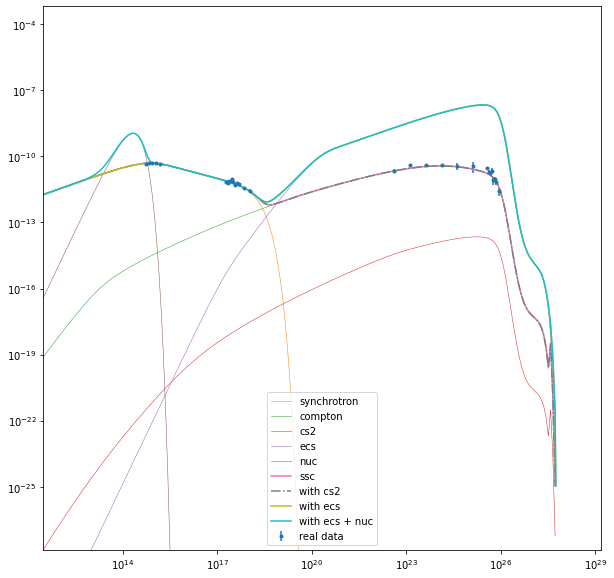

In [18]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
real = ax.errorbar(real_v, real_vFv, yerr=real_err, fmt='.', label="real data")
orig_xlim1, orig_xlim2 = ax.get_xlim()
orig_ylim1, orig_ylim2 = ax.get_ylim()

ax.set_xlim(1 / 500 * orig_xlim1, 500 * orig_xlim2)
ax.set_ylim(1/ 10e15 * orig_ylim1, 10e6 * orig_ylim2)

ss, = ax.plot(v_synchrotron, vFv_synchrotron, label="synchrotron", linewidth=.5)
cs, = ax.plot(v_compton, vFv_compton, label="compton", linewidth=.5)
cs2, = ax.plot(v_cs2, vFv_cs2, label="cs2", linewidth=.5)
ecs, = ax.plot(v_ecs, vFv_ecs, label="ecs", linewidth=.5)
nuc, = ax.plot(v_nuc, vFv_nuc, label="nuc", linewidth=.5)

ssc, = ax.plot(v_ssc, vFv_ssc, label="ssc", ls='-', linewidth=1.5)
ssc2, = ax.plot(v_ssc2, vFv_ssc2, label="with cs2", ls='-.', linewidth=1.5)
eic, = ax.plot(v_eic, vFv_eic, '-', label="with ecs", linewidth=1.5)
nuc_eic, = ax.plot(v_nuc_eic, vFv_nuc_eic, '-', label="with ecs + nuc", linewidth=1.5)

lines = [real, ss, cs, cs2, ecs, nuc, ssc, ssc2, eic, nuc_eic]

ax.legend(fancybox=True)


In [19]:
plt.plot(logv_eic, logvFv_eic - logvFv_ssc2)
logvFv_eic - logvFv_ssc2

ValueError: operands could not be broadcast together with shapes (284,) (283,) 

In [ ]:
plt.plot(logv_ssc2, logvFv_ssc2 - logvFv_ssc)
logvFv_ssc2 - logvFv_ssc